<a href="https://colab.research.google.com/github/Jenarth/SCS3250-Group-2-Final-Project/blob/master/Rough%20Work/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Data Analysis ("First Look")

## Import Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

## Read Data Files

In [5]:
# Set up path variables with explicit file names
path2017 = 'https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Weather%20Data/en_climate_daily_ON_6158355_2017_P1D.csv'
path2018 = 'https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Weather%20Data/en_climate_daily_ON_6158355_2018_P1D.csv'
path2019 = 'https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Weather%20Data/en_climate_daily_ON_6158355_2019_P1D.csv'
path2020 = 'https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Weather%20Data/en_climate_daily_ON_6158355_2020_P1D.csv'

# Load each file into a Pandas DataFrame:
weather2017 = pd.read_csv(path2017, parse_dates=[4]) # dates in column 4 (5th column)
weather2018 = pd.read_csv(path2018, parse_dates=[4]) # dates in column 4 (5th column)
weather2019 = pd.read_csv(path2019, parse_dates=[4]) # dates in column 4 (5th column)
weather2020 = pd.read_csv(path2020, parse_dates=[4]) # dates in column 4 (5th column)

# Concatenate all records into a single DataFrame:
weather = pd.concat([weather2017, weather2018, weather2019, weather2020])

weather


,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2017-01-01,2017,1,1,NaN,3.1,NaN,-0.5,NaN,1.3,NaN,16.7,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
1,-79.4,43.67,TORONTO CITY,6158355,2017-01-02,2017,1,2,NaN,5.5,NaN,0.7,NaN,3.1,NaN,14.9,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
2,-79.4,43.67,TORONTO CITY,6158355,2017-01-03,2017,1,3,NaN,4.8,NaN,2.4,NaN,3.6,NaN,14.4,NaN,0.0,NaN,NaN,M,NaN,M,11.3,NaN,1.0,NaN,NaN,M,NaN,M
3,-79.4,43.67,TORONTO CITY,6158355,2017-01-04,2017,1,4,NaN,3.8,NaN,-7.6,NaN,-1.9,NaN,19.9,NaN,0.0,NaN,NaN,M,NaN,M,0.6,NaN,NaN,NaN,NaN,M,NaN,M
4,-79.4,43.67,TORONTO CITY,6158355,2017-01-05,2017,1,5,NaN,-5.3,NaN,-10.3,NaN,-7.8,NaN,25.8,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,NaN,NaN,NaN,M,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-79.4,43.67,TORONTO CITY,6158355,2020-12-27,2020,12,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,-79.4,43.67,TORONTO CITY,6158355,2020-12-28,2020,12,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,-79.4,43.67,TORONTO CITY,6158355,2020-12-29,2020,12,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,-79.4,43.67,TORONTO CITY,6158355,2020-12-30,2020,12,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# List columns:

weather2017.info()
#weather.info()
#weather2019.info()
#weather2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Longitude (x)              365 non-null    float64       
 1   Latitude (y)               365 non-null    float64       
 2   Station Name               365 non-null    object        
 3   Climate ID                 365 non-null    int64         
 4   Date/Time                  365 non-null    datetime64[ns]
 5   Year                       365 non-null    int64         
 6   Month                      365 non-null    int64         
 7   Day                        365 non-null    int64         
 8   Data Quality               0 non-null      float64       
 9   Max Temp (°C)              357 non-null    float64       
 10  Max Temp Flag              10 non-null     object        
 11  Min Temp (°C)              361 non-null    float64       
 12  Min Temp

In [0]:
# Display summary statistics:

#weather2017.describe()
#weather2018.describe()
#weather2019.describe()
#weather2020.describe()

In [8]:
weather['Snow on Grnd Flag'].unique()
weather['Total Snow Flag'].value_counts()
weather2018[weather2018['Total Precip (mm)']>0]
weather2018[weather2018['Max Temp (°C)'].isnull()]

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
58,-79.4,43.67,TORONTO CITY,6158355,2018-02-28,2018,2,28,NaN,NaN,M,5.1,E,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,0.0,T,NaN,M,NaN,M
59,-79.4,43.67,TORONTO CITY,6158355,2018-03-01,2018,3,1,NaN,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,0.0,T,NaN,M,NaN,M
60,-79.4,43.67,TORONTO CITY,6158355,2018-03-02,2018,3,2,NaN,NaN,M,-0.5,E,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,4.0,NaN,NaN,M,NaN,M
61,-79.4,43.67,TORONTO CITY,6158355,2018-03-03,2018,3,3,NaN,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,NaN,NaN,M,NaN,M
62,-79.4,43.67,TORONTO CITY,6158355,2018-03-04,2018,3,4,NaN,NaN,M,-3.1,E,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,NaN,NaN,M,NaN,M
63,-79.4,43.67,TORONTO CITY,6158355,2018-03-05,2018,3,5,NaN,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,NaN,NaN,M,NaN,M
64,-79.4,43.67,TORONTO CITY,6158355,2018-03-06,2018,3,6,NaN,NaN,M,-1.4,E,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,NaN,NaN,M,NaN,M
98,-79.4,43.67,TORONTO CITY,6158355,2018-04-09,2018,4,9,NaN,NaN,M,-3.6,E,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,NaN,NaN,M,NaN,M
157,-79.4,43.67,TORONTO CITY,6158355,2018-06-07,2018,6,7,NaN,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,NaN,NaN,M,NaN,M
192,-79.4,43.67,TORONTO CITY,6158355,2018-07-12,2018,7,12,NaN,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,NaN,NaN,M,NaN,M


In [0]:
#Preview data:

#weather2017
#weather2018
#weather2019
#weather2020

## Correct/Enhance Data

### Check Flags for Snow/Rain

In [10]:
weather2018[['Snow on Grnd Flag', 'Total Rain Flag', 'Total Snow Flag']].head(20)

,Snow on Grnd Flag,Total Rain Flag,Total Snow Flag
0,NaN,M,M
1,NaN,M,M
2,NaN,M,M
3,NaN,M,M
4,NaN,M,M
5,NaN,M,M
6,NaN,M,M
7,NaN,M,M
8,NaN,M,M
9,NaN,M,M


### Convert Flag Columns to Boolean

### Add Year Month Column

In [11]:
# Add a year-month column for monthly summaries:
weather['year_month'] = weather['Date/Time'].dt.to_period('M')
weather.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag,year_month
0,-79.4,43.67,TORONTO CITY,6158355,2017-01-01,2017,1,1,NaN,3.1,NaN,-0.5,NaN,1.3,NaN,16.7,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M,2017-01
1,-79.4,43.67,TORONTO CITY,6158355,2017-01-02,2017,1,2,NaN,5.5,NaN,0.7,NaN,3.1,NaN,14.9,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M,2017-01
2,-79.4,43.67,TORONTO CITY,6158355,2017-01-03,2017,1,3,NaN,4.8,NaN,2.4,NaN,3.6,NaN,14.4,NaN,0.0,NaN,NaN,M,NaN,M,11.3,NaN,1.0,NaN,NaN,M,NaN,M,2017-01
3,-79.4,43.67,TORONTO CITY,6158355,2017-01-04,2017,1,4,NaN,3.8,NaN,-7.6,NaN,-1.9,NaN,19.9,NaN,0.0,NaN,NaN,M,NaN,M,0.6,NaN,NaN,NaN,NaN,M,NaN,M,2017-01
4,-79.4,43.67,TORONTO CITY,6158355,2017-01-05,2017,1,5,NaN,-5.3,NaN,-10.3,NaN,-7.8,NaN,25.8,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,NaN,NaN,NaN,M,NaN,M,2017-01


In [12]:
weather[weather['year_month']=='2020-01']

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag,year_month
0,-79.4,43.67,TORONTO CITY,6158355,2020-01-01,2020,1,1,NaN,1.0,NaN,-1.2,NaN,-0.1,NaN,18.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.2,NaN,1.0,NaN,NaN,M,NaN,M,2020-01
1,-79.4,43.67,TORONTO CITY,6158355,2020-01-02,2020,1,2,NaN,6.2,NaN,0.9,NaN,3.6,NaN,14.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,M,NaN,M,2020-01
2,-79.4,43.67,TORONTO CITY,6158355,2020-01-03,2020,1,3,NaN,7.7,NaN,3.6,NaN,5.7,NaN,12.3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,M,NaN,M,2020-01
3,-79.4,43.67,TORONTO CITY,6158355,2020-01-04,2020,1,4,NaN,3.6,NaN,0.3,NaN,2.0,NaN,16.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.5,NaN,2.0,NaN,NaN,M,NaN,M,2020-01
4,-79.4,43.67,TORONTO CITY,6158355,2020-01-05,2020,1,5,NaN,1.9,NaN,-1.2,NaN,0.3,NaN,17.7,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.6,NaN,2.0,NaN,NaN,M,NaN,M,2020-01
5,-79.4,43.67,TORONTO CITY,6158355,2020-01-06,2020,1,6,NaN,2.9,NaN,-1.7,NaN,0.6,NaN,17.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.2,NaN,7.0,NaN,NaN,M,NaN,M,2020-01
6,-79.4,43.67,TORONTO CITY,6158355,2020-01-07,2020,1,7,NaN,3.9,NaN,-3.0,NaN,0.4,NaN,17.6,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,NaN,M,NaN,M,2020-01
7,-79.4,43.67,TORONTO CITY,6158355,2020-01-08,2020,1,8,NaN,0.7,NaN,-7.9,NaN,-3.6,NaN,21.6,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.6,NaN,5.0,NaN,NaN,M,NaN,M,2020-01
8,-79.4,43.67,TORONTO CITY,6158355,2020-01-09,2020,1,9,NaN,3.4,NaN,-9.8,NaN,-3.2,NaN,21.2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3.0,NaN,NaN,M,NaN,M,2020-01
9,-79.4,43.67,TORONTO CITY,6158355,2020-01-10,2020,1,10,NaN,7.6,NaN,3.3,NaN,5.4,NaN,12.6,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.1,NaN,2.0,NaN,NaN,M,NaN,M,2020-01


### Set Date Column as Index

In [13]:
# Set the date column as the index:
weather = weather.set_index('Date/Time')
weather

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag,year_month
Date/Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,-79.4,43.67,TORONTO CITY,6158355,2017,1,1,NaN,3.1,NaN,-0.5,NaN,1.3,NaN,16.7,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M,2017-01
2017-01-02,-79.4,43.67,TORONTO CITY,6158355,2017,1,2,NaN,5.5,NaN,0.7,NaN,3.1,NaN,14.9,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M,2017-01
2017-01-03,-79.4,43.67,TORONTO CITY,6158355,2017,1,3,NaN,4.8,NaN,2.4,NaN,3.6,NaN,14.4,NaN,0.0,NaN,NaN,M,NaN,M,11.3,NaN,1.0,NaN,NaN,M,NaN,M,2017-01
2017-01-04,-79.4,43.67,TORONTO CITY,6158355,2017,1,4,NaN,3.8,NaN,-7.6,NaN,-1.9,NaN,19.9,NaN,0.0,NaN,NaN,M,NaN,M,0.6,NaN,NaN,NaN,NaN,M,NaN,M,2017-01
2017-01-05,-79.4,43.67,TORONTO CITY,6158355,2017,1,5,NaN,-5.3,NaN,-10.3,NaN,-7.8,NaN,25.8,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,NaN,NaN,NaN,M,NaN,M,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,-79.4,43.67,TORONTO CITY,6158355,2020,12,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12
2020-12-28,-79.4,43.67,TORONTO CITY,6158355,2020,12,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12
2020-12-29,-79.4,43.67,TORONTO CITY,6158355,2020,12,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12


### Check for Outliers

### Check for Missing Data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2017-03-02 to 2020-03-01
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   Station Name       1096 non-null   object   
 1   Year               1096 non-null   int64    
 2   Month              1096 non-null   int64    
 3   Day                1096 non-null   int64    
 4   Max Temp (°C)      1096 non-null   float64  
 5   Min Temp (°C)      1096 non-null   float64  
 6   Mean Temp (°C)     1096 non-null   float64  
 7   Total Precip (mm)  1096 non-null   float64  
 8   Snow on Grnd (cm)  1096 non-null   float64  
 9   year_month         1096 non-null   period[M]
dtypes: float64(5), int64(3), object(1), period[M](1)
memory usage: 94.2+ KB


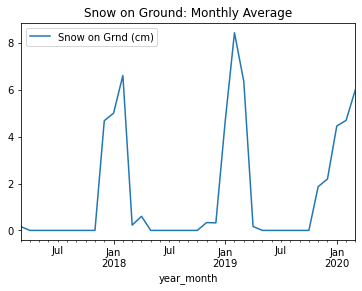

In [14]:
weather = weather[(weather.index > '2017-03') & (weather.index <= '2020-03')] #extracting March 2017 to March 2020 data
weather = weather.drop(["Longitude (x)",
                        "Latitude (y)", 
                        "Climate ID", 
                        "Data Quality", 
                        "Spd of Max Gust (km/h)", 
                        "Spd of Max Gust Flag", 
                        "Dir of Max Gust (10s deg)", 
                        "Dir of Max Gust Flag", 
                        "Total Rain Flag", 
                        "Total Snow Flag", 
                       "Total Rain (mm)", 
                       "Total Snow (cm)",
                        "Max Temp Flag",
                        "Mean Temp Flag",
                        "Min Temp Flag",
                        "Total Precip Flag",
                        "Heat Deg Days Flag",
                        "Cool Deg Days Flag",
                        "Heat Deg Days (°C)",
                        "Cool Deg Days (°C)"], 
                       axis = 1) 

#unique values for the flags:
# M = missing, E = estimated
#Max Temp Flag = nan, M, E
#Mean Temp Flag = nan, M, E
#Min Temp Flag = nan, M, E
#Total Snow Flag = M, E
#Snow on Grnd Flag = T, nan
#Flags simly mean missing (M), estimated (E), or not filled in (NaN) - we can remove them and just keep temp and prec data
# heat deg days = Heating degree-days for a given day are the number of degrees Celsius that the mean temperature is below 18 °C, if temp > 18, this will be 0
# cool deg days = Cooling degree-days for a given day are the number of degrees Celsius that the mean temperature is above 18 °C, if temp < 18, this will be 0
#these can be used to distinguish between rain and snow?
#missing values for max temp, min temp, mean temp, total precipitation


weather['Max Temp (°C)'] = weather['Max Temp (°C)'].interpolate(method='slinear').interpolate(method='linear')
weather['Mean Temp (°C)'] = weather['Mean Temp (°C)'].interpolate(method='slinear').interpolate(method='linear')
weather['Min Temp (°C)'] = weather['Min Temp (°C)'].interpolate(method='slinear').interpolate(method='linear')
weather['Total Precip (mm)'] = weather['Total Precip (mm)'].interpolate(method='slinear').interpolate(method='linear')

weather["Snow on Grnd (cm)"].unique()
weather["Snow on Grnd Flag"].unique()


weather['Snow on Grnd (cm)'] = weather['Snow on Grnd (cm)'].fillna(0) #filling the NaNs with 0's for no snow on ground

weather[weather['year_month']=='2019-04']

weather[['year_month', 'Snow on Grnd (cm)']].groupby(['year_month']).mean().plot(title='Snow on Ground: Monthly Average')

weather['Snow on Grnd (cm)'] = weather['Snow on Grnd Flag'].apply(lambda x: 0.5 if x == 'T' else x) #for trace snow, changing 0 to 0.5 - number can be changed if needed
weather['Snow on Grnd (cm)'] = weather['Snow on Grnd (cm)'].fillna(0) #filling the NaNs with 0's for no snow on ground

weather = weather.drop(["Snow on Grnd Flag"], 
                       axis = 1) 
weather
weather.info()

## Visualizations

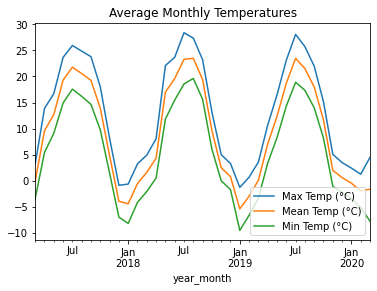

In [15]:
weather[['year_month', 'Max Temp (°C)', 'Mean Temp (°C)', 'Min Temp (°C)']].groupby('year_month').mean().plot(title='Average Monthly Temperatures')

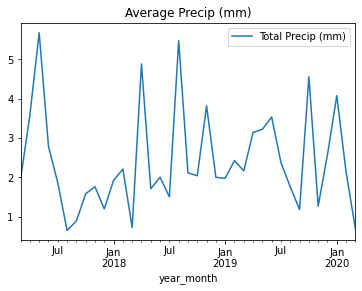

In [16]:
weather[['year_month', 'Total Precip (mm)']].groupby('year_month').mean().plot(title='Average Precip (mm)')

In [17]:
weather.describe()

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Precip (mm),Snow on Grnd (cm)
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2018.166058,6.521898,15.732664,13.270347,5.711724,9.486998,2.466606,0.010949
std,0.898389,3.450561,8.805388,10.947654,9.996698,10.360443,6.085261,0.073208
min,2017.000000,1.000000,1.000000,-15.400000,-22.300000,-18.900000,0.000000,0.000000
25%,2017.000000,4.000000,8.000000,4.100000,-1.500000,1.300000,0.000000,0.000000
50%,2018.000000,7.000000,16.000000,12.900000,5.250000,8.900000,0.000000,0.000000
75%,2019.000000,10.000000,23.000000,23.325000,14.725000,18.800000,1.400000,0.000000
max,2020.000000,12.000000,31.000000,33.800000,23.200000,27.800000,58.200000,0.500000
